# ECE1508: Applied Deep Learning
# Assignment 1
## Malhotra, Vanshaj

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Try an example

In [6]:
np.ones(3)

array([1., 1., 1.])

## Programming Question 1

In [ ]:
class LinearMachine():
    def __init__(self):
        # Define weights as attribute
        # Set the initial values randomly

        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(2,1)
        # ============================================
        pass

    def data_synthesizer(self, dataset_size, velocity_mean, velocity_var,
                         height_mean, height_var):

        # Draw random velocity and height
        # Let the array size to be <dataset_size>
        # Don't forget to make them positive using np.abs()
        
        # ============ COMPLETE HERE ================
        v_sample = np.random.normal(velocity_mean, velocity_var, dataset_size)
        h_sample = np.random.normal(height_mean, height_var, dataset_size)

        v_sample = np.abs(v_sample)
        h_sample = np.abs(h_sample)

        # Compute distance d via Newton's law
        d_sample = 0.45 * v_sample * np.sqrt(h_sample)
        # ============================================

        # Make the dataset
        # ============ COMPLETE HERE ================
        x_mat = np.column_stack((v_sample,h_sample))
        d_mat = d_sample.reshape(-1,1)
        dataset = (x_mat, d_mat)
        return dataset
        # ============================================
        pass

    def train_GD(self, dataset, lr, delta = float("inf"), max_iterations = 1e12):

        # We can reset the weights to some initial random values
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(2,1)
        # ============================================

        # read data-points and labels
        # ============ COMPLETE HERE ================
        x_mat , d_mat = dataset
        N = x_mat.shape[0]
        # ============================================

        # Count number of iterations to stop after max iterations
        counter = 0

        # Initiate risk
        risk = 1e-5

        while delta > risk and counter < max_iterations:
            
            # Compute Gradient
            # ============ COMPLETE HERE ================
            y_hat = x_mat @ self._weights
            grad = (2/N) * (x_mat.T @ (y_hat - d_mat))
            # ============================================

            # Save risk at current weights
            # ============ COMPLETE HERE ================
            old_risk = risk
            # ============================================

            # Update weights using GD with learning rate lr
            # ============ COMPLETE HERE ================
            self._weights -= lr * grad
            # ============================================

            # Compute new risk
            # ============ COMPLETE HERE ================
            risk = np.mean((y_hat - d_mat) ** 2)
            # ============================================

            # Update stopping criteria
            delta = np.abs(risk - old_risk)
            counter += 1

        # Print out if the code stops due to max iterations, i.e., GD did not converge
        if counter == max_iterations:
            print(f"GD dos not converge: train_GD hit max iterations = {max_iterations}!")

        return risk
    

    def train(self, dataset):
          # Find the minimizer
          # ============ COMPLETE HERE ================
          # self._weights = ## COMPLETE ## Multiple lines
          # ============================================


          # Compute minimum risk
          # ============ COMPLETE HERE ================
          risk_opt = 0  ## COMPLETE ## Multiple lines
          # ============================================
          return risk_opt

    def test(self, J, velocity_mean, velocity_var, height_mean, height_var):
          
          # Generate an independent dataset for test
          # ============ COMPLETE HERE ================
        v_test = np.random.normal(velocity_mean, velocity_var, 5000)
        h_test = np.random.normal(height_mean, height_var, 5000)

        v_test = np.abs(v_test)
        h_test = np.abs(h_test)
        d_test = 0.45 * v_test * np.sqrt(h_test)
        x_test_mat = np.column_stack((v_test, h_test))
        d_test_mat = d_test.reshape(-1,1)  
          
        dataset = (x_test_mat, d_test_mat)
          # ============================================

          # Compute the risk via the trained weights
          # ============ COMPLETE HERE ================
        y_hat = x_test_mat @ self._weights
          # ============================================

          # Compute test risk
          # ============ COMPLETE HERE ================
        risk_test = np.mean((y_hat - d_test_mat)**2)  ## COMPLETE ##
          # ============================================
        return risk_test


### Gradient Descent vs Optimal Training

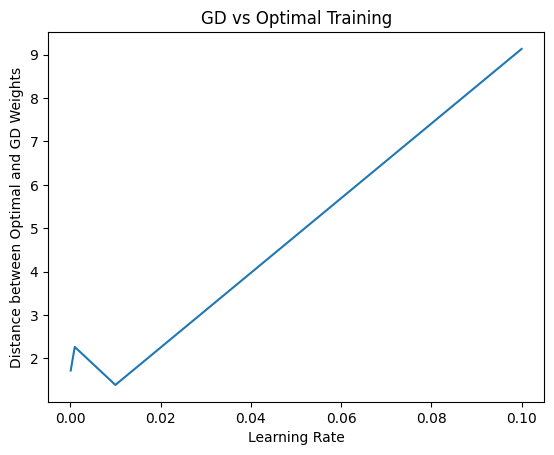

In [8]:
def Optimality_Gap(lr_list):
    myModel = LinearMachine()
    dataset = myModel.data_synthesizer(100, 1, 5, 3, 3)

    # Initiate optimality gap vector
    Opt_gap = []

    # Find optimal weights
    myModel.train(dataset)
    weights_optimal = myModel._weights

    # Find GD trained weights 
    for lr in lr_list:
        # ============ COMPLETE HERE ================
        model_gd = LinearMachine()
        model_gd.train_GD(dataset, lr=lr, max_iterations=5000)

        weights_GD = model_gd._weights.copy()
        # ============================================

        # Append the optimality gap 
        Opt_gap.append(np.linalg.norm(weights_optimal-weights_GD))


    # Plot 
    plt.figure()
    plt.plot(lr_list, Opt_gap)
    plt.title('GD vs Optimal Training')
    plt.xlabel('Learning Rate')
    plt.ylabel('Distance between Optimal and GD Weights')

    plt.show()


# Execute your implementation
Optimality_Gap([0.1, 0.01, 0.001, 0.0001])

### Test Loop

Text(0, 0.5, 'Test Risk')

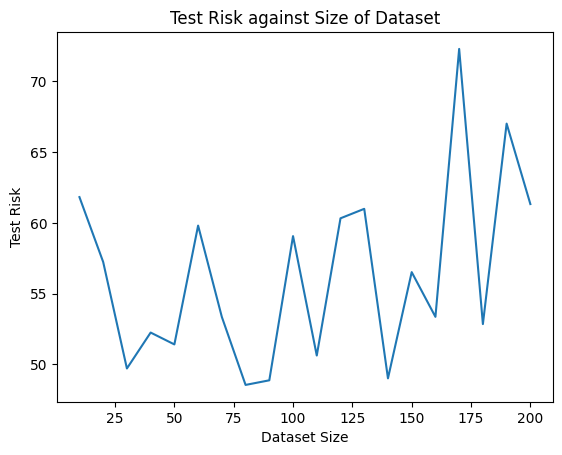

In [19]:
def eval_model(T, I, J, velocity_mean, velocity_var, height_mean, height_var):
  myModel = LinearMachine()
  lr = 0.001
  
  # Initiate the risk 
  emp_risk = 1e-6

  # Loop over t
  for t in range(T):
    # ============ COMPLETE HERE ================
    train_dataset = myModel.data_synthesizer(I, velocity_mean, velocity_var, height_mean, height_var)
        
        
    model_gd = LinearMachine()
    model_gd.train_GD(train_dataset, lr=lr, max_iterations=5000)
        
    risk_test = model_gd.test(J, velocity_mean, velocity_var,height_mean, height_var)
        
       
    emp_risk += risk_test
    # # ============================================
  
  # average rist over datasets
  emp_risk = emp_risk / T

  return emp_risk


# Make list for plot
emp_risk_list = []
T, J = 100, 10

# loop over I
I_list = [10*i for i in range(1,21)]
for I in I_list:
  emp_risk_list.append(eval_model(T, I, J, 1, 5, 3, 3))


# Plot
plt.figure()
plt.plot(I_list, emp_risk_list)
plt.title('Test Risk against Size of Dataset')
plt.xlabel('Dataset Size')
plt.ylabel('Test Risk')


## Programming Question 2

### Perceptron Machine

In [7]:
class PerceptronMachine():
    def __init__(self):
        # define weights as attribute and initiate randomly
        self._dimensions = 9
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(self._dimensions)
        self._bias = np.random.randn(1)
        # ============================================


    def forward(self, datapoint):
        # Affine function
        # ============ COMPLETE HERE ================
                
        affine = np.dot(self._weights, datapoint) + self._bias
        # ============================================

        # Activate by step function
        return 1 if affine > 0 else 0

    def train(self, dataset, lr):
        # initiate weights again randomly as we start with training
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(self._dimensions)
        self._bias = np.random.randn(1)
        # ============================================

        # initiate error_flag with 1 to get to the while loop
        error_flag = 1

        while error_flag > 0:
            # We initially have no error
            error_flag = 0
            for data in dataset:
                # Read data
                x = data[0]
                label = data[1]

                # Pass it forward
                y = self.forward(x)

                # Implement inner loop
                if y != label:
                    # Find sign(z) 
                    # ============ COMPLETE HERE ================
                    sign_z = (label - y)
                    # ============================================

                    # Set movement vector = sgn(z) * x
                    # ============ COMPLETE HERE ================
                    movement = sign_z * np.array(x)
                    # ============================================

                    # Update
                    # ============ COMPLETE HERE ================
                    self._weights += lr * movement
                    self._bias += lr * sign_z
                    # ============================================

                    # Since we had error, we set the flag 1 again
                    error_flag = 1


### X Pattern

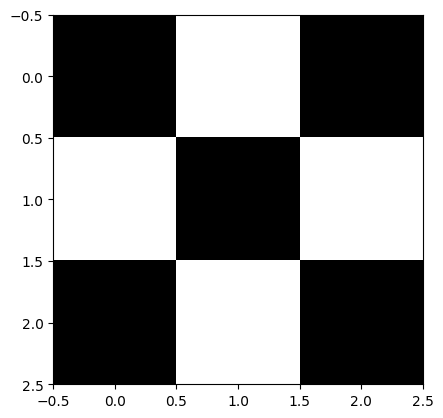

In [12]:
# Generating the X Pattern
# Run this code to see X pattern

x = 256* np.ones([3,3],dtype = int)

for i in range(3):
    x[i,i] = 0
    x[i,2-i] = 0

plt.imshow(x,cmap='gray')

x_pattern = [0, 1, 0,
             1, 0, 1,
             0, 1, 0]

### Generate Dataset and Train

In [13]:
# Generate the Dataset
# Initiate empty dataset
dataset = []
image_list = []

# We have 2^9=512 possibilities: loop over them
for i in range(512): 
    # generate 9-dimensional vector
    # ============ COMPLETE HERE ================
    bits = [(i >> k) & 1 for k in range (9)]
    vec = [b for b in bits]
    # ============================================

    # label the vector
    # ============ COMPLETE HERE ================
    if vec == x_pattern:
        label = 1
    else :
        label = 0
    
    dataset.append([vec, label])

    # ============================================


# Instantiate a perceptron and train it 
myModel = PerceptronMachine()
myModel.train(dataset, 0.001)

### Test Trained Model

In [14]:
# Initiate the test set
testset = []

# Add the X pattern
testset.append([0, 1, 0, 1, 0, 1, 0, 1, 0])

# Choose some data samples
for i in range(10):
    rand_idx = int(np.random.rand() * 512) % 512
    while rand_idx == 170:
        rand_idx = int(np.random.rand() * 512) % 512
    testset.append(dataset[rand_idx][0])


# Test the set: only the first one should return 1
for test in testset:
    print(f"Is it X patter? Answer: {myModel.forward(test)}")


Is it X patter? Answer: 1
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0


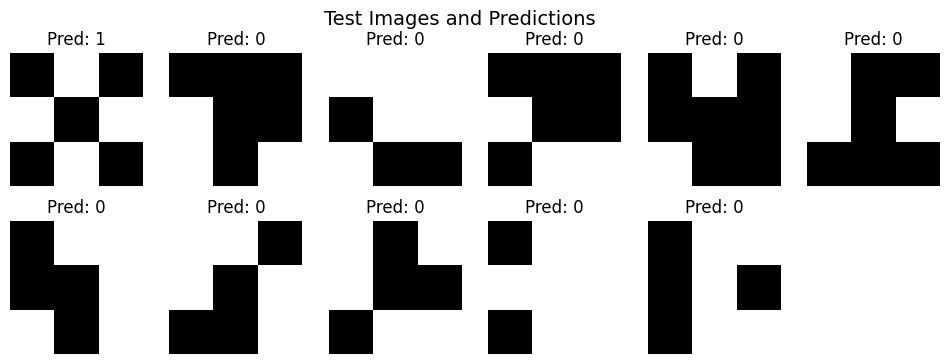

In [ ]:
testset = []


testset.append([0, 1, 0,
                1, 0, 1,
                0, 1, 0])


for i in range(10):
    rand_idx = int(np.random.rand() * 512) % 512
    while dataset[rand_idx][0] == testset[0]:  
        rand_idx = int(np.random.rand() * 512) % 512
    testset.append(dataset[rand_idx][0])



plt.figure(figsize=(12, 4))

for idx, test in enumerate(testset):
    prediction = myModel.forward(test)

    
    img = np.array(test).reshape(3, 3)

    
    plt.subplot(2, 6, idx+1)  
    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.axis("off")
    plt.title(f"Pred: {prediction}")

plt.suptitle("Test Images and Predictions", fontsize=14)
plt.show()